# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/airbnb_listings.csv', index_col=0)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,within an hour,100%,100%,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50792,42890730,within an hour,100%,99%,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50793,42891018,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50794,42891637,NaN,NaN,100%,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [ ]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
missing_num=df.isnull().sum()
df1=missing_num.to_frame(name = 'missing_num')
df1['missingnum_percent']=df1.missing_num/len(df)*100
df1=df1.sort_values(['missingnum_percent'],ascending=False)
df2=df1[df1.missingnum_percent >0]
df2=df2.sort_values(['missingnum_percent'],ascending=False)
df2

,missing_num,missingnum_percent
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_location,11482,22.604142


In [ ]:
#Q2 

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

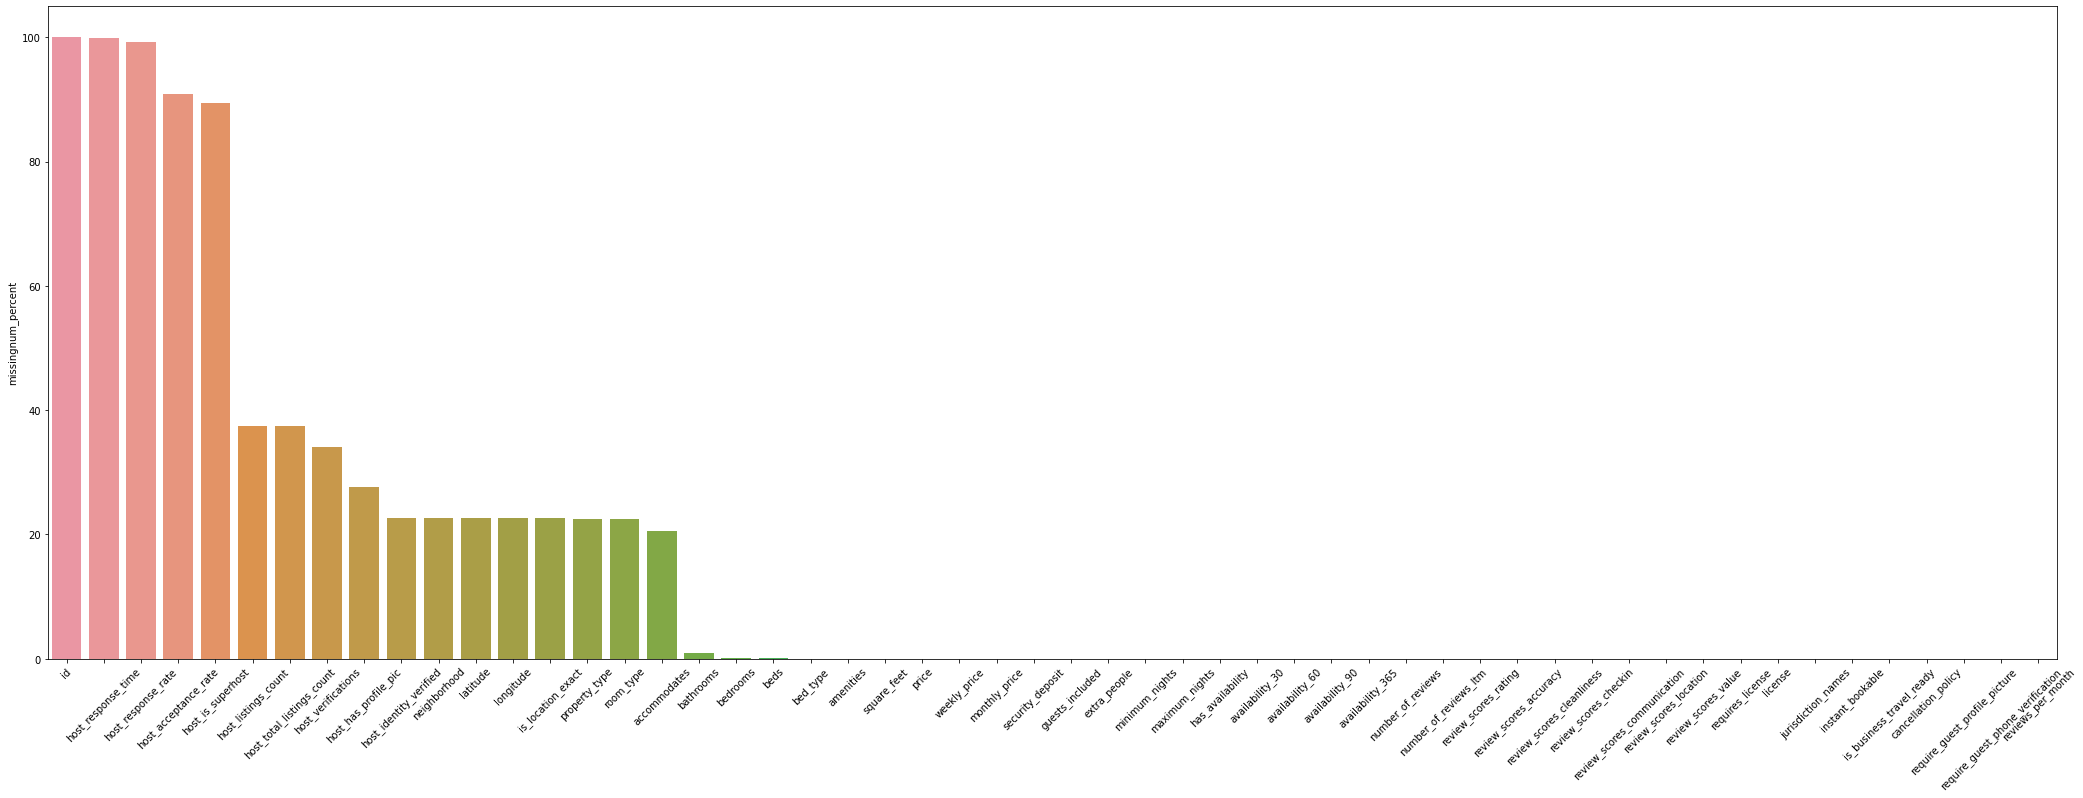

In [ ]:
plt.figure(figsize=(36,12))
plt.xticks(rotation = 45)
sns.barplot(x=df.columns,y="missingnum_percent", data = df1)

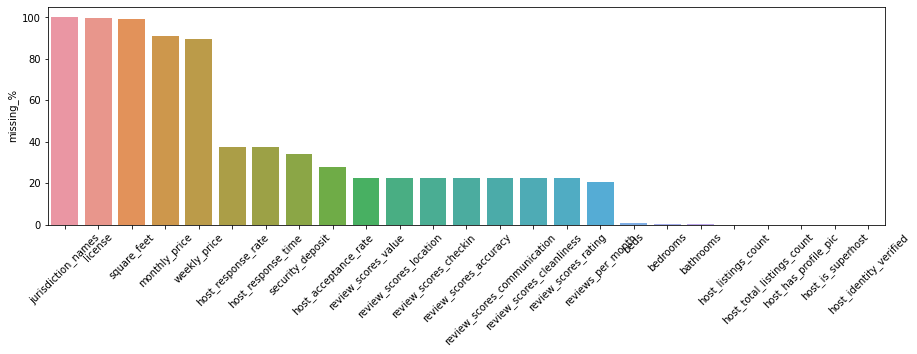

In [ ]:
# Q3

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [ ]:
# Q4
Beds=df[df.beds.isnull() == True]
Beds.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [ ]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [ ]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

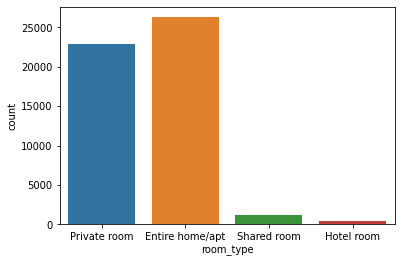

In [ ]:
# Q5
sns.countplot(x='room_type', data=df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

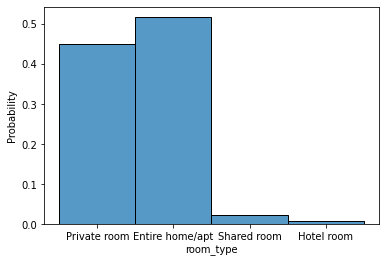

In [ ]:
# Q6
sns.histplot(x='room_type',data=df,stat='probability')

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

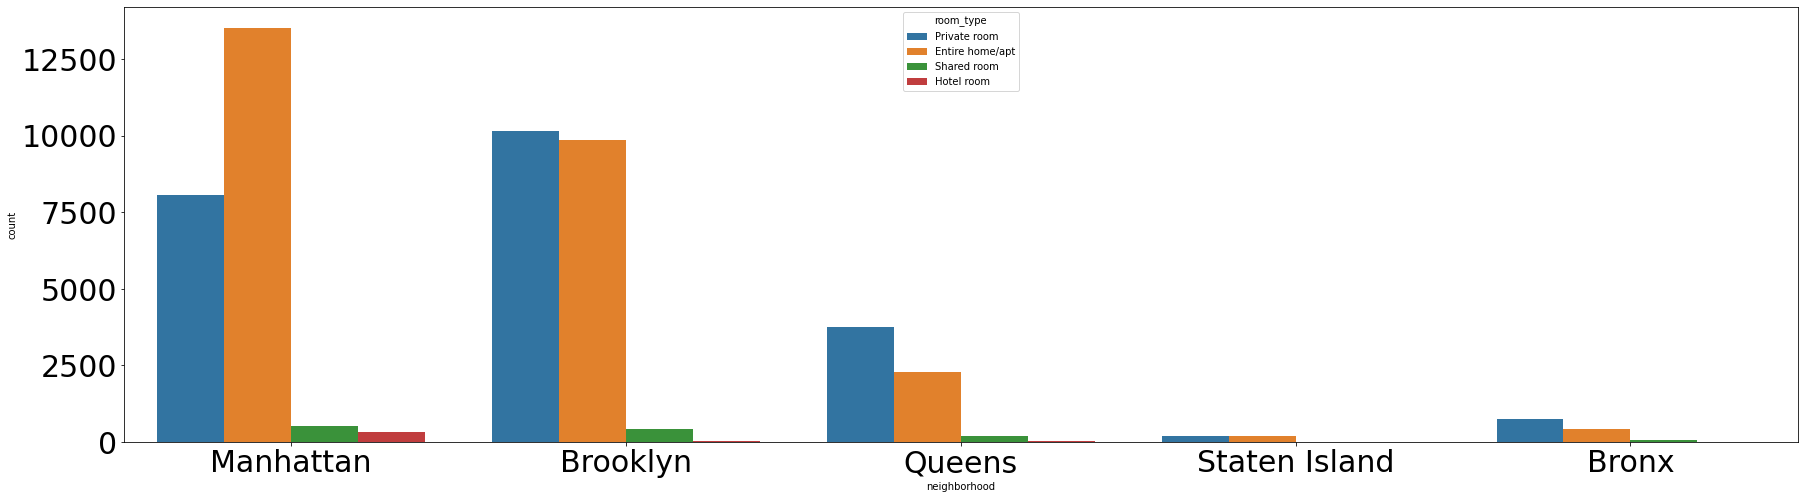

In [ ]:
# Q7
plt.figure(figsize=(30,8))
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)
sns.countplot(x="neighborhood",hue="room_type", data=df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

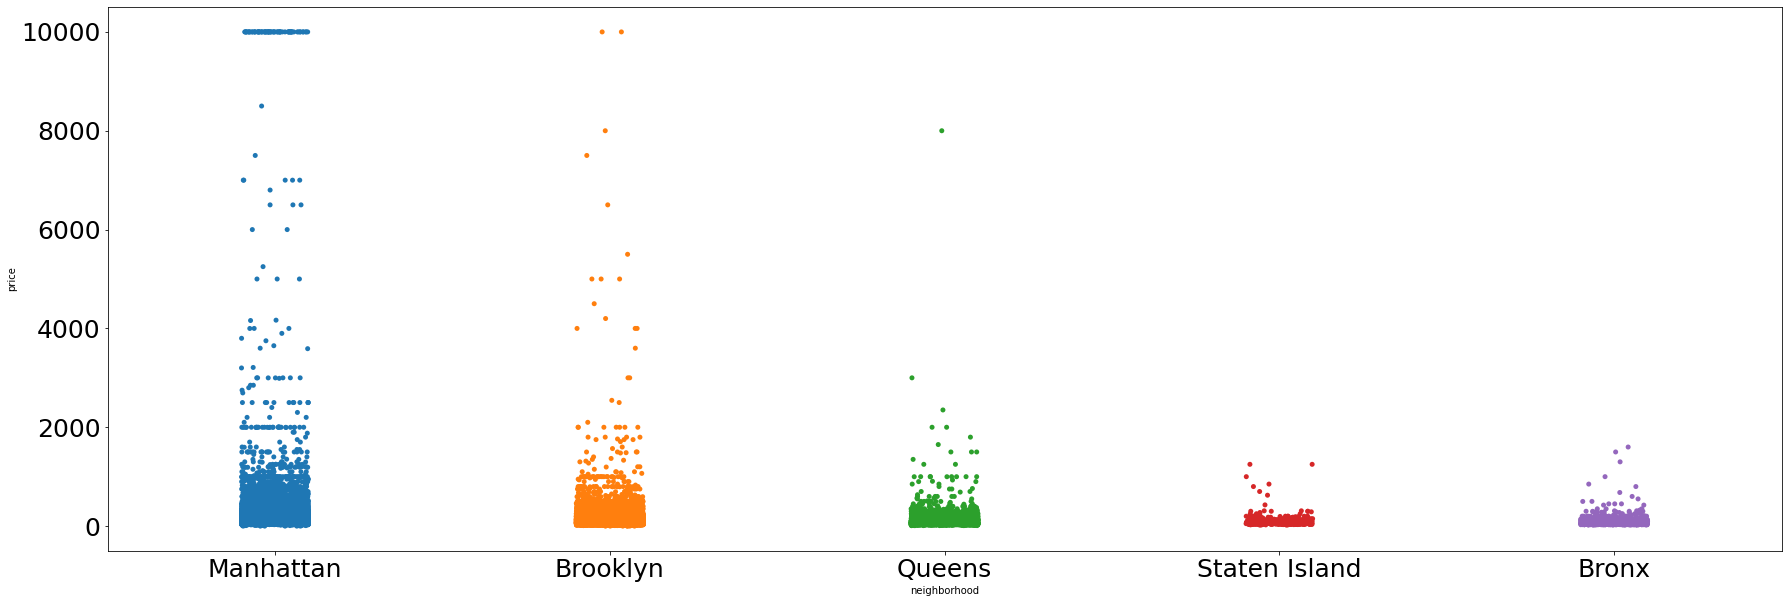

In [ ]:
# Q8
plt.figure(figsize=(30,10))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
sns.stripplot(x='neighborhood', y='price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
# Queens 지역 가격의 평균은 가격의 중앙값보다 클 것이다. rea) 8000 부근에 이상치 1개가 존재하므로
# 8번 그래프에서 지역이 배열된 순서대로 가격의 평균치가 높다. rea) 주로 형성된 층이 위쪽에 배열되어 있기도 하고, 특히 manhattan은 10000에도 이상치 군집이 형성되어 있어서
# entire home/apt와 privaate room의 비율이 매우 높다. rea) airbnb 특성상 호텔이나 share room을 빌려주기엔 힘들기 때문이라고 생각한다.
# manhattan을 제외하면, 대부분 집보단 방 한 칸을 빌려주는 경향을 띤다. rea)아무래도 자가를 소유한 사람의 수도 적을 것이고, 집 전체를 빌려주기엔 부담이 크기 때문이다.
# manhattan과 brooklyn이 숙박업이 발달해 있다. rea) 7번 그래프에서 보듯 표본의 수가 상대적으로 많아서


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

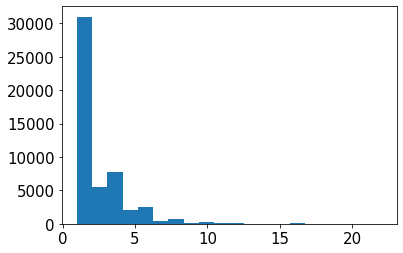

In [ ]:
# Q10
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(x="accommodates", data= df, bins = 20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

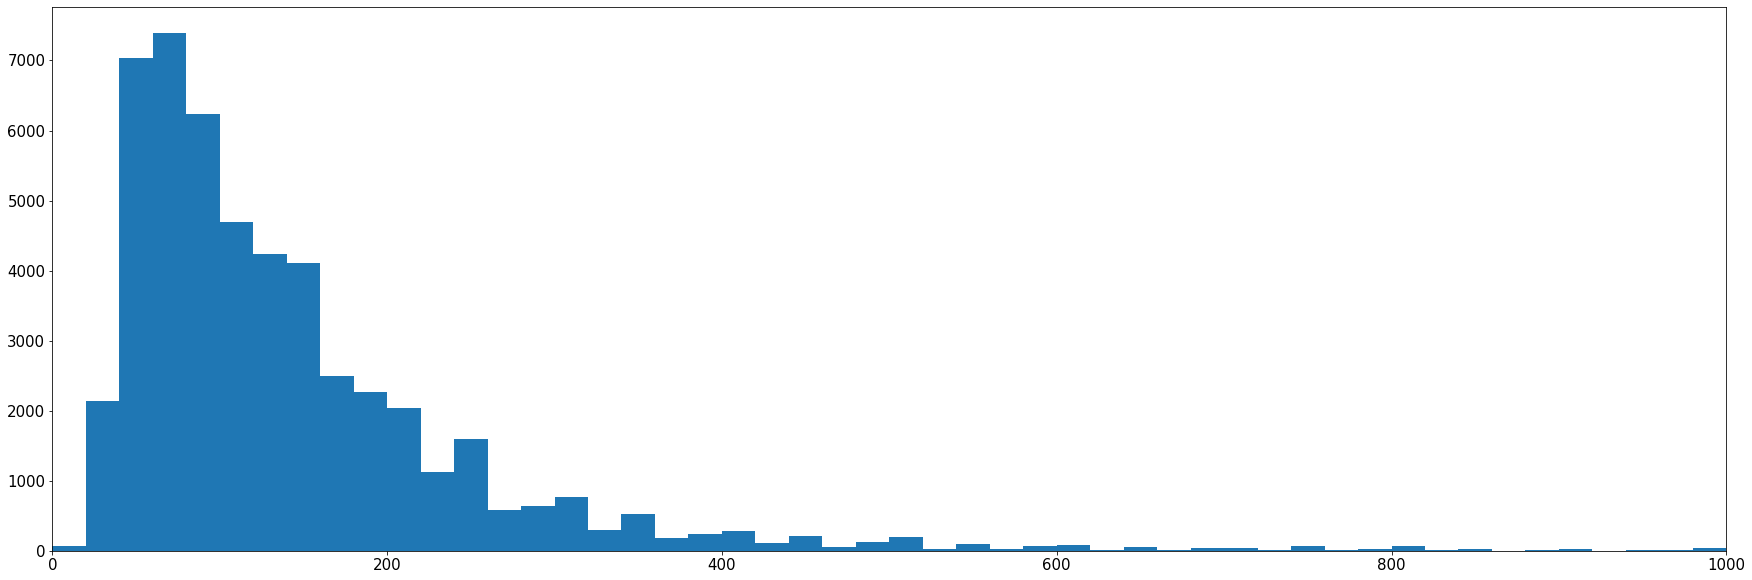

In [ ]:
# Q11
plt.figure(figsize=(30,10))
plt.xlim([0,1000])
plt.hist(x="price", data= df, bins = 500)
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/airbnb_listings.csv', index_col=0)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [ ]:
#Q12
nullrate=df.isnull().sum()
df_nullrate=null_count.to_frame()
df_na=pd.DataFrame(columns=["na"])
df_na["na"]=df_nullrate
na_percent=(df.isnull().sum() / len(df) *100).round(2)
df_na_percent=na_percent.to_frame()
df_missingpercent=pd.DataFrame(columns=["missing_%"])
df_missingpercent["missing_%"]=df_na_percent
df_null= pd.concat([df_missingnum, df_missingpercent], axis=1)
df_null=df_null.sort_values(by="missing_num",ascending=False)

df_1=df_null[df_null["missing_%"] >=25]
df_1_index=df_1.index
df=df.drop(df_1_index, axis=1)

df_3=df_null[df_null["missing_%"]<10]
df_3_index=df_3.index
df=df.fillna(df[df_3_index].median())

df=df.dropna(axis=0)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39290 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39290 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39290 non-null  float64
 3   host_total_listings_count         39290 non-null  float64
 4   host_verifications                39290 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39290 non-null  object 
 8   latitude                          39290 non-null  float64
 9   longitude                         39290 non-null  float64
 10  is_location_exact                 39290 non-null  object 
 11  property_type                     39290 non-null  object 
 12  room

<ipython-input-24-3f93576b09bc>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df[df_3_index].median())


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [ ]:
#Q13-1) # 고객의 리뷰 빈도를 통해 분류하기 위해
df['reviews_per_month']
review_rate = []
for a in df['reviews_per_month']:
  if (a < 1):
    review_rate.append('ghost')
  elif (1 <= a <= 2):
    review_rate.append('client')
  else:
    review_rate.append('emperor')

df['review_rate'] = review_rate

In [ ]:
df.head()

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,review_rate
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38,ghost
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,8.0,f,f,f,moderate,f,f,4.71,emperor
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,9.0,f,f,f,moderate,t,t,0.59,ghost
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56,ghost
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38,ghost


In [ ]:
#Q13-2) #해당 서비스를 이용한 사람 중 슈퍼호스트의 비율을 확인하기 위해
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoded = encoder.fit_transform(df['host_is_superhost'])

In [ ]:
df['host_is_superhost'] = encoded

In [ ]:
df.host_is_superhost.value_counts()

0    29890
1     9400
Name: host_is_superhost, dtype: int64

In [ ]:
#Q13-3) # 각 고객들이 어떤 특징을 가지고 있는지 한 눈에 알아보기 위해
pd.get_dummies(df['review_rate'])

,client,emperor,ghost
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
50490,1,0,0
50526,1,0,0
50598,1,0,0
50650,1,0,0


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
